# ViT paper Replicating with pytorch 

In [1]:
import torch
torch.__version__

'2.5.1+cu118'

In [2]:
!nvidia-smi


Wed Dec 25 16:57:16 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 530.41.03              Driver Version: 530.41.03    CUDA Version: 12.1     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                  Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf            Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 2080 Ti      Off| 00000000:05:00.0 Off |                  N/A |
| 30%   52C    P8               24W / 250W|    151MiB / 11264MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
# Continue with regular imports
import matplotlib.pyplot as plt
import torch
import torchvision

from torch import nn
from torchvision import transforms

In [4]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

# Dataset path takes in manual way

In [5]:
from pathlib import Path
image_path = Path('/home/xia_1818/Naim/MyModel/custom_data_module/raw-img') # Conver it to a Path object

In [6]:
import os
def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its contents.
  Args:
    dir_path (str or pathlib.Path): target directory
  
  Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
  """
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [7]:
walk_through_dir('/home/xia_1818/Naim/MyModel/custom_data_module/raw-img')

There are 10 directories and 0 images in '/home/xia_1818/Naim/MyModel/custom_data_module/raw-img'.
There are 0 directories and 1446 images in '/home/xia_1818/Naim/MyModel/custom_data_module/raw-img/elefante'.
There are 0 directories and 1862 images in '/home/xia_1818/Naim/MyModel/custom_data_module/raw-img/scoiattolo'.
There are 0 directories and 3098 images in '/home/xia_1818/Naim/MyModel/custom_data_module/raw-img/gallina'.
There are 0 directories and 4863 images in '/home/xia_1818/Naim/MyModel/custom_data_module/raw-img/cane'.
There are 0 directories and 1820 images in '/home/xia_1818/Naim/MyModel/custom_data_module/raw-img/pecora'.
There are 0 directories and 2112 images in '/home/xia_1818/Naim/MyModel/custom_data_module/raw-img/farfalla'.
There are 0 directories and 2623 images in '/home/xia_1818/Naim/MyModel/custom_data_module/raw-img/cavallo'.
There are 0 directories and 1668 images in '/home/xia_1818/Naim/MyModel/custom_data_module/raw-img/gatto'.
There are 0 directories and 18

Random image path: /home/xia_1818/Naim/MyModel/custom_data_module/raw-img/gatto/ea36b40b21f2093ed1584d05fb1d4e9fe777ead218ac104497f5c978a7e8b7bc_640.jpg
Image class: gatto
Image height: 426
Image width: 640


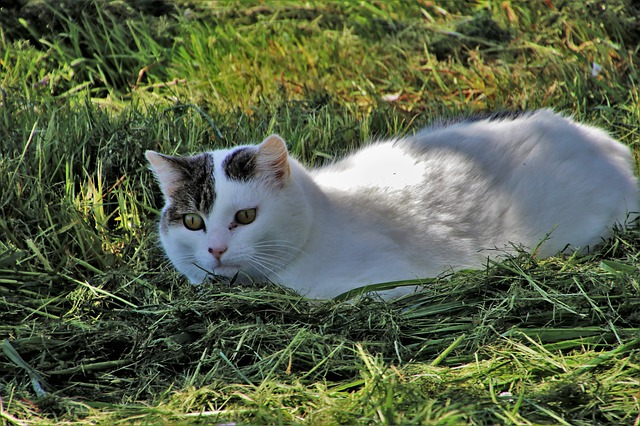

In [8]:
import random
from PIL import Image

# Set seed
random.seed(42) # <- try changing this and see what happens

# 1. Get all image paths (* means "any combination")
image_path_list = list(image_path.glob("*/*.jpg"))

# 2. Get random image path
random_image_path = random.choice(image_path_list)

# 3. Get image class from path name (the image class is the name of the directory where the image is stored)
image_class = random_image_path.parent.stem

# 4. Open image
img = Image.open(random_image_path)

# 5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}") 
print(f"Image width: {img.width}")
img

(-0.5, 639.5, 425.5, -0.5)

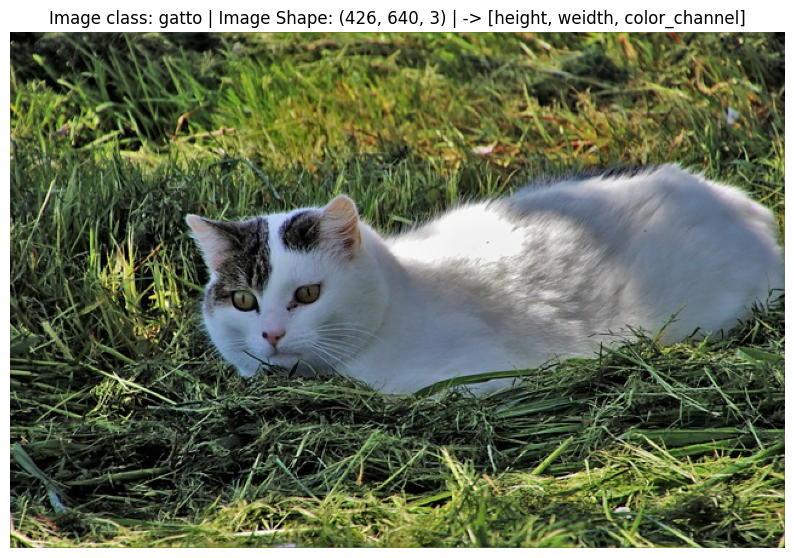

In [9]:
# show image with matplotlib.pyplot
import numpy as np
import matplotlib.pyplot as plt

# Turn your data into an array
image_as_array = np.asarray(img)

# plot the image with matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(image_as_array)
plt.title(f"Image class: {image_class} | Image Shape: {image_as_array.shape} | -> [height, weidth, color_channel]")
plt.axis(False)

In [10]:
import torch
from torchvision import datasets , transforms


manual_transformer= transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.ToTensor(),
    ])

In [11]:
from torch.utils.data import DataLoader ,random_split
import torch.nn as nn
full_dataset = datasets.ImageFolder(image_path, transform=manual_transformer)

train_size = int(len(full_dataset) * 0.8)
test_size = len(full_dataset) - train_size


In [12]:
class_names = full_dataset.classes
class_names

['cane',
 'cavallo',
 'elefante',
 'farfalla',
 'gallina',
 'gatto',
 'mucca',
 'pecora',
 'ragno',
 'scoiattolo']

In [13]:
class_dict = full_dataset.class_to_idx
class_dict

{'cane': 0,
 'cavallo': 1,
 'elefante': 2,
 'farfalla': 3,
 'gallina': 4,
 'gatto': 5,
 'mucca': 6,
 'pecora': 7,
 'ragno': 8,
 'scoiattolo': 9}

In [14]:
import os
NUM_WORKERS = os.cpu_count()

train_data, test_data = random_split(full_dataset, [train_size, test_size])

train_loader = DataLoader(train_data,
                          batch_size=48,
                          num_workers=NUM_WORKERS,
                          shuffle=True)
test_loader = DataLoader(test_data,
                         batch_size=48,
                         num_workers=NUM_WORKERS,
                         shuffle=False)

len(train_data), len(test_data), len(train_loader), len(test_loader)

(20943, 5236, 437, 110)

In [15]:
# Get a batch of images
image_batch, label_batch = next(iter(train_loader))

# Get a single image from the batch
image, label = image_batch[0], label_batch[0]
image.shape, label

(torch.Size([3, 224, 224]), tensor(8))

(-0.5, 223.5, 223.5, -0.5)

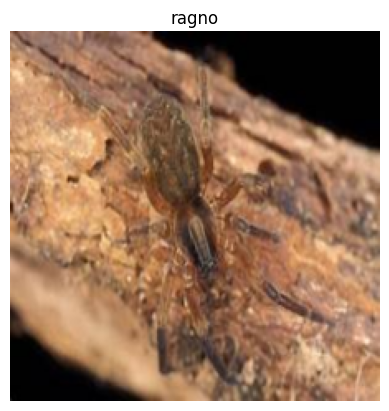

In [16]:
# Plot the image with matplotlib
plt.imshow(image.permute(1,2,0))
plt.title(class_names[label])
plt.axis(False)

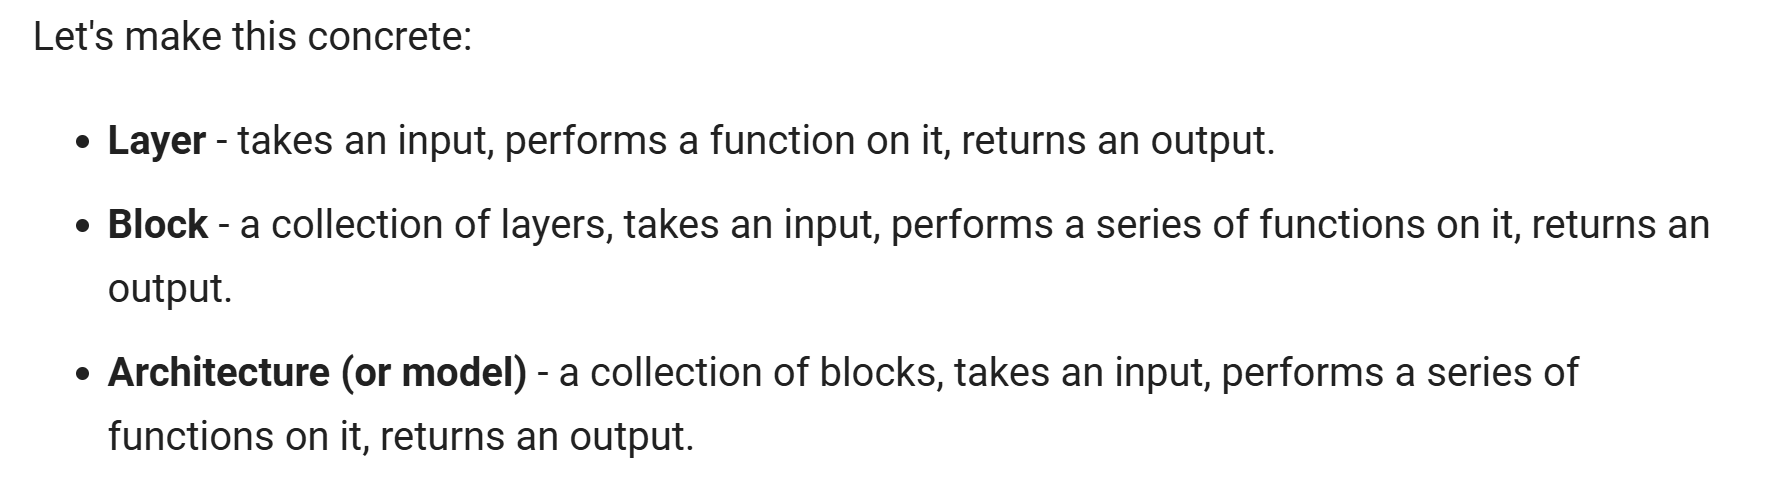

# Equation 1: Split data into patches and creating the class, position and patch embedding

In [17]:
# Calculate number of patches 

# Create some values
height = 224 # H
width = 224 # W

color_channel = 3 # C
patch_size = 16 # P

# Calculate N (number of patches) we know the formula is N = (H*W) / P**2
num_patches =int((height * width)/ patch_size**2)
print(f"Number of patches (N) with image height (H={height}), width (W={width}) and patch size (P={patch_size}, total number of patches:{num_patches}")

Number of patches (N) with image height (H=224), width (W=224) and patch size (P=16, total number of patches:196


In [18]:
# Input shape (this is the size of a single image)
embedding_layer_input_shape = (height, width, color_channel)

# output shape 
embedding_layer_output_shape = (num_patches, patch_size**2 * color_channel)

print(f'Input shape(single 2D image) : {embedding_layer_input_shape}')
print(f'Output shape(single 2D image) : {embedding_layer_output_shape}')


Input shape(single 2D image) : (224, 224, 3)
Output shape(single 2D image) : (196, 768)


(-0.5, 223.5, 223.5, -0.5)

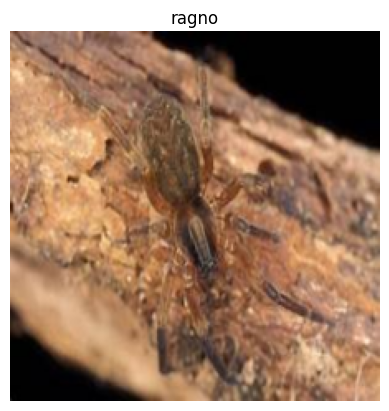

In [19]:
# View single image in matplotlib
plt.imshow(image.permute(1,2,0))
plt.title(class_names[label])
plt.axis(False)

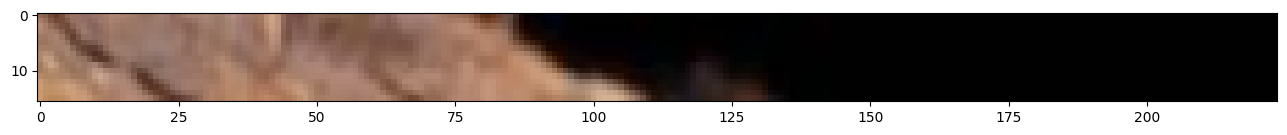

In [20]:
# Chagne image shape to be compatible with matplotlib 
image_permuted = image.permute(1,2,0)

# Index to plot the top row of patched pixel
patch_size = 16
plt.figure(figsize=(patch_size, patch_size))
plt.imshow(image_permuted[:patch_size, :, :])

Number of patches per row: 14.0
Patch size: 16 pixels x 16 pixels


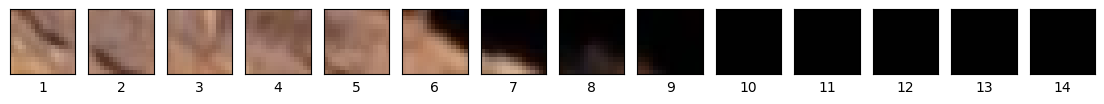

In [21]:
# Setup hyperparameters and make sure img_size and patch_size are compatible

img_size = 224
patch_size = 16
num_patches = img_size / patch_size

assert img_size % patch_size ==0, 'Image size must be divisible by patch size'
print(f"Number of patches per row: {num_patches}\nPatch size: {patch_size} pixels x {patch_size} pixels")

# Create a series of subplots
fig, axs = plt.subplots(nrows=1,
                        ncols=img_size // patch_size, # # one column for each patch
                        figsize=(num_patches, num_patches),
                        sharex=True,
                        sharey=True)
for i, patch in enumerate(range(0, img_size, patch_size)):
    axs[i].imshow(image_permuted[:patch_size, patch:patch+patch_size, :]) # keep height index constant, alter the width index
    axs[i].set_xlabel(i+1) # set the label
    axs[i].set_xticks([])
    axs[i].set_yticks([])




Number of patches per row: 14.0        
Number of patches per column: 14.0        
Total patches: 196.0        
Patch size: 16 pixels x 16 pixels


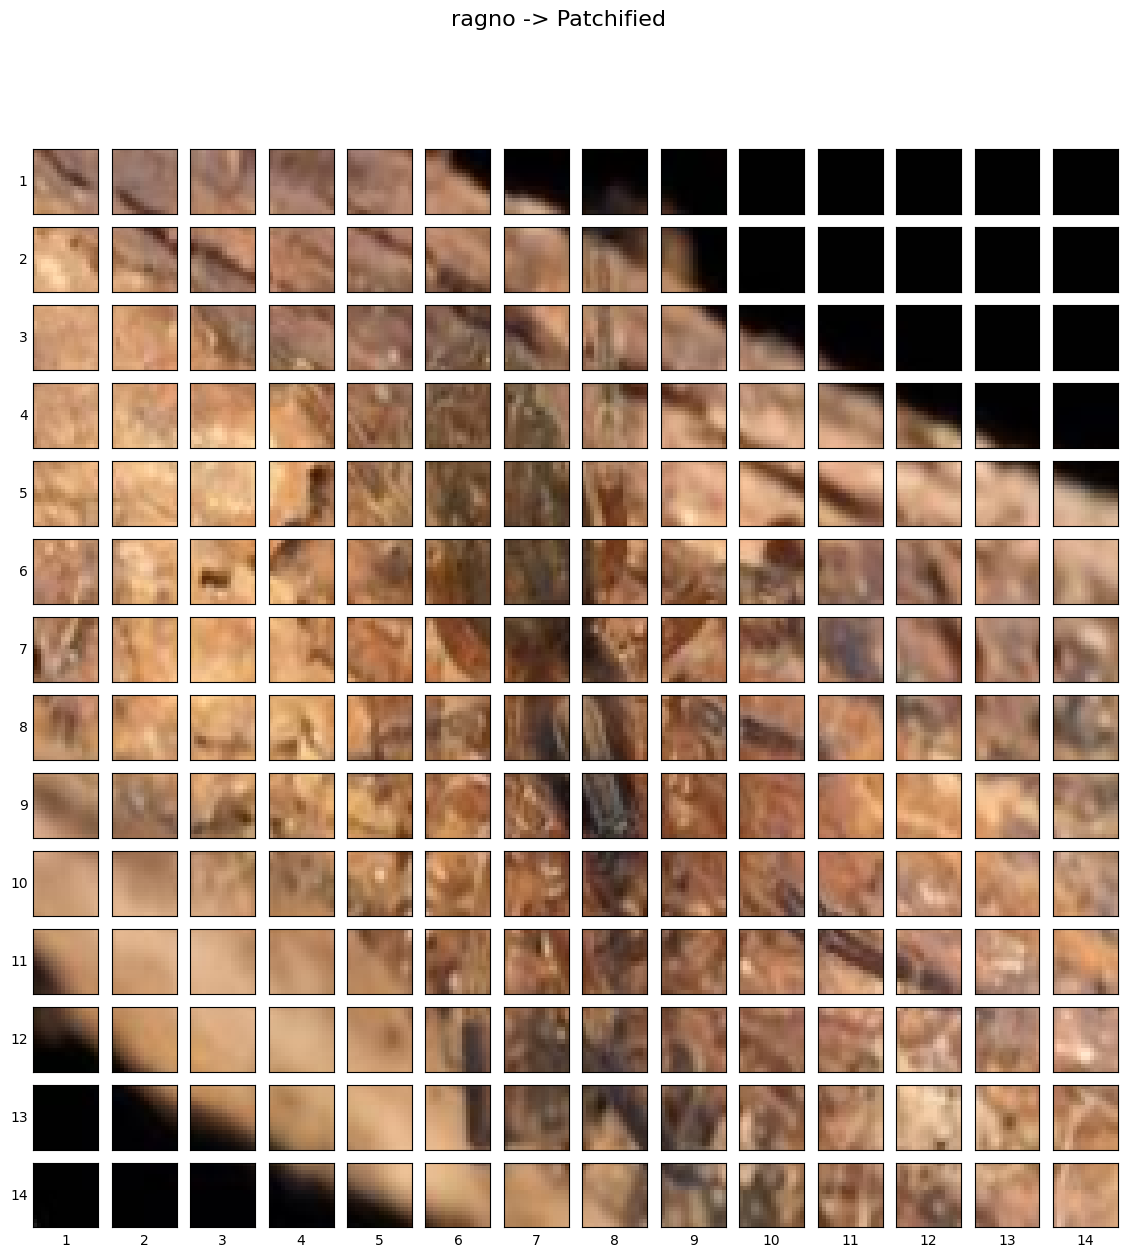

In [22]:
# Setup hyperparameters and make sure img_size and patch_size are compatible
img_size = 224
patch_size = 16
num_patches = img_size / patch_size

assert img_size % patch_size == 0, 'Image size must be divisible by patch size'
print(f"Number of patches per row: {num_patches}\
        \nNumber of patches per column: {num_patches}\
        \nTotal patches: {num_patches*num_patches}\
        \nPatch size: {patch_size} pixels x {patch_size} pixels")
# Create a series of subplots
fig, axs = plt.subplots(nrows=img_size // patch_size,
                        ncols=img_size // patch_size,
                         figsize = (num_patches, num_patches),
                         sharex=True,
                         sharey=True )
# Loop through height and width of image
for i, patch_height in enumerate(range(0, img_size, patch_size)): # iterate through height
    for j, patch_width in enumerate(range(0, img_size, patch_size)): # iterate through width

        # Plot the permuted image patch (image_permuted -> (Height, Width, Color Channels))
        axs[i, j].imshow(image_permuted[patch_height:patch_height+patch_size, # iterate through height
                                        patch_width:patch_width+patch_size, # iterate through width
                                        :]) # get all color channels
        # Set up label information, remove the ticks for clarity and set labels to outside

        axs[i,j].set_ylabel(i+1,
                            rotation='horizontal',
                            horizontalalignment='right',
                            verticalalignment='center')
        axs[i,j].set_xlabel(j+1)
        axs[i,j].set_xticks([])
        axs[i,j].set_yticks([])
        axs[i,j].label_outer([])

# Set a super title
fig.suptitle(f"{class_names[label]} -> Patchified", fontsize=16)
plt.show()
        


In [23]:
from torch import nn
# Set the patch size
patch_size = 16

# Create the Conv2d layer with hyperparameters from the vit paper
conv2d = nn.Conv2d(in_channels=3, # Nuber of color channel
                   out_channels=768, # from Table 1: Hidden size D, this is the embedding size
                   kernel_size=patch_size, # could also use (patch_size, patch_size)
                   stride=patch_size,
                   padding=0)

(-0.5, 223.5, 223.5, -0.5)

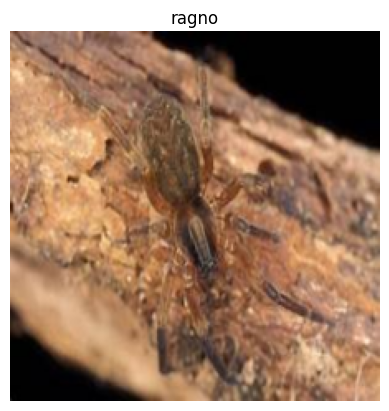

In [24]:
# View a single image 
plt.imshow(image.permute(1,2,0))
plt.title(class_names[label])
plt.axis(False)

In [25]:
# Pass the image through the convolutional layer
image_through_conv = conv2d(image.unsqueeze(0))
image_through_conv.shape

torch.Size([1, 768, 14, 14])

Showing random convolutional feature maps from indexes: [114, 25, 281, 250, 228, 142, 754, 104, 692, 558]


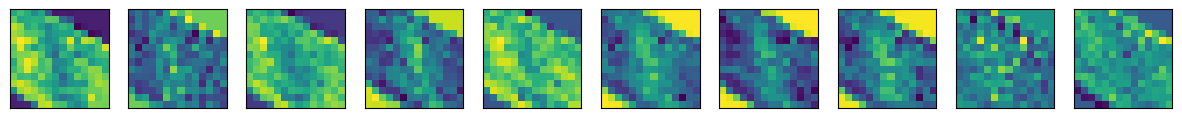

In [26]:
# Plot random 10 convolutional feature maps
import random
random_indexes = random.sample(range(0, 758), k=10) # pick 5 numbers between 0 and the embedding size
print(f"Showing random convolutional feature maps from indexes: {random_indexes}")

# Create plot
fig, axs = plt.subplots(nrows=1, ncols=10, figsize=(15, 15))

# Plot random image feature maps
for i, idx in enumerate(random_indexes):
    image_conv_feature_map = image_through_conv[:, idx, :, :] # index on the output tensor of the convolutional layer
    axs[i].imshow(image_conv_feature_map.squeeze().detach().numpy())
    axs[i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[]);

In [27]:
# Get a single feature map in tensor form
single_feature_map = image_through_conv[:, 0, :, :]
single_feature_map, single_feature_map.requires_grad

(tensor([[[-6.9902e-02, -2.1802e-03, -3.1669e-02, -6.8773e-03,  2.7276e-02,
           -2.3466e-01,  1.3565e-02, -1.1285e-05,  3.0562e-02,  3.0444e-02,
            3.0444e-02,  3.0444e-02,  3.0444e-02,  3.0444e-02],
          [-6.4292e-02, -1.9500e-03,  7.5716e-02, -2.8614e-02,  1.0145e-02,
           -1.8631e-02, -7.3544e-02, -1.0334e-01, -1.1258e-01,  3.0575e-02,
            3.0444e-02,  3.0444e-02,  3.0444e-02,  3.0444e-02],
          [-4.2541e-02, -5.2029e-02, -6.2173e-02,  2.2281e-03, -5.3377e-02,
           -1.8888e-02,  1.5784e-01,  1.7713e-02, -6.7224e-02, -7.7520e-02,
            2.0458e-02,  2.8799e-02,  3.0444e-02,  3.0444e-02],
          [-3.1847e-02, -4.6586e-02, -2.6325e-02, -1.1468e-01, -5.0757e-02,
           -2.9655e-02,  4.8877e-02, -6.8600e-02,  1.1392e-01, -4.4065e-02,
           -4.7215e-02, -2.1302e-01,  1.0111e-03,  3.4520e-02],
          [ 3.4259e-02, -3.5549e-02, -6.8689e-03, -1.5962e-01, -2.4490e-02,
           -3.4900e-02,  2.5470e-02, -7.9103e-02,  3.1109e-0

In [28]:
# 1. Create a class which subclasses nn.Module
class PatchEmbedding(nn.Module):
    """Turns a 2D input image into a 1D sequence learnable embedding vector.

    Args:
        in_channels (int): Number of color channels for the input images. Defaults to 3.
        patch_size (int): Size of patches to convert input image into. Defaults to 16.
        embedding_dim (int): Size of embedding to turn image into. Defaults to 768.
    """
    # 2. Initialize the class with appropriate variables
    def __init__(self,
                 in_channels:int=3,
                 patch_size:int=16,
                 embedding_dim:int=768):
        super().__init__()

        # 3. Create a layer to turn an image into patches
        self.patcher = nn.Conv2d(in_channels=in_channels,
                                 out_channels=embedding_dim,
                                 kernel_size=patch_size,
                                 stride=patch_size,
                                 padding=0)

        # 4. Create a layer to flatten the patch feature maps into a single dimension
        self.flatten = nn.Flatten(start_dim=2, # only flatten the feature map dimensions into a single vector
                                  end_dim=3)

    # 5. Define the forward method
    def forward(self, x):
        # Create assertion to check that inputs are the correct shape
        image_resolution = x.shape[-1]
        assert image_resolution % patch_size == 0, f"Input image size must be divisible by patch size, image shape: {image_resolution}, patch size: {patch_size}"

        # Perform the forward pass
        x_patched = self.patcher(x)
        x_flattened = self.flatten(x_patched)
        # 6. Make sure the output shape has the right order
        return x_flattened.permute(0, 2, 1) # adjust so the embedding is on the final dimension [batch_size, P^2•C, N] -> [batch_size, N, P^2•C]

In [29]:
import random
# Create an instance of patch embedding layer
patchify = PatchEmbedding(in_channels=3,
                          patch_size=16,
                          embedding_dim=768)

# Pass a single image through
print(f"Input image shape: {image.unsqueeze(0).shape}")
patch_embedded_image = patchify(image.unsqueeze(0)) # add an extra batch dimension on the 0th index, otherwise will error
print(f"Output patch embedding shape: {patch_embedded_image.shape}")

Input image shape: torch.Size([1, 3, 224, 224])
Output patch embedding shape: torch.Size([1, 196, 768])


In [30]:
from torchinfo import summary
random_input_image = (1, 3, 224, 224)
summary(PatchEmbedding(),
         input_size=random_input_image, # try swapping this for "random_input_image_error"
         col_names=["input_size", "output_size", "num_params", "trainable"],
         col_width=20,
         row_settings=["var_names"])

Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
PatchEmbedding (PatchEmbedding)          [1, 3, 224, 224]     [1, 196, 768]        --                   True
├─Conv2d (patcher)                       [1, 3, 224, 224]     [1, 768, 14, 14]     590,592              True
├─Flatten (flatten)                      [1, 768, 14, 14]     [1, 768, 196]        --                   --
Total params: 590,592
Trainable params: 590,592
Non-trainable params: 0
Total mult-adds (M): 115.76
Input size (MB): 0.60
Forward/backward pass size (MB): 1.20
Params size (MB): 2.36
Estimated Total Size (MB): 4.17

In [31]:
# Viewing the patch embedding and patch embedding shape
print(patch_embedded_image)
print(f'Patch embedding shape: {patch_embedded_image.shape} -> [batch_size, Number_of_patch, embedding dimension]')

tensor([[[ 0.3437,  0.2287,  0.2872,  ..., -0.0032, -0.1181,  0.3254],
         [ 0.2670,  0.1373,  0.2343,  ...,  0.0247, -0.2711,  0.3800],
         [ 0.2413,  0.2277,  0.3365,  ..., -0.0327, -0.2706,  0.4030],
         ...,
         [ 0.1904,  0.1256,  0.3049,  ..., -0.0015, -0.2065,  0.3923],
         [ 0.2956,  0.0991,  0.2641,  ...,  0.0055, -0.4089,  0.5399],
         [ 0.3113,  0.2609,  0.2742,  ..., -0.0302, -0.2465,  0.4431]]],
       grad_fn=<PermuteBackward0>)
Patch embedding shape: torch.Size([1, 196, 768]) -> [batch_size, Number_of_patch, embedding dimension]


In [32]:
# we'll get the batch size and embedding dimension shape and then we'll create a torch.ones() tensor in the shape [batch_size, 1, embedding_dimension].
# Get the batch size and embedding dimension
batch_size = patch_embedded_image.shape[0]
embedding_dimension = patch_embedded_image.shape[-1]

# Create the class token embedding as a learnable paramerter that shares the same size as the embedding dimension (D)
class_token = nn.Parameter(torch.ones(batch_size, 1, embedding_dimension), # [batch_size, number_of_tokens, embedding_dimension]
                           requires_grad=True) # make sure the embedding is learnable

# Show the first 10 examples of the class_token
print(class_token[:, :, :10])

# Print the class_token shape
print(f"Class token shape: {class_token.shape} -> [batch_size, number_of_tokens, embedding_dimension]")


tensor([[[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]]], grad_fn=<SliceBackward0>)
Class token shape: torch.Size([1, 1, 768]) -> [batch_size, number_of_tokens, embedding_dimension]


In [33]:
# Add the class token embedding to the front of the patch embedding
patch_embedded_image_with_class_embedding = torch.cat((class_token, patch_embedded_image),
                                                      dim=1)


# Print the sequence of patch embeddings with the prepended class token embedding
print(patch_embedded_image_with_class_embedding)
print(f"Sequence of patch embeddings with class token prepended shape: {patch_embedded_image_with_class_embedding.shape} -> [batch_size, number_of_patches, embedding_dimension]")

tensor([[[ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000],
         [ 0.3437,  0.2287,  0.2872,  ..., -0.0032, -0.1181,  0.3254],
         [ 0.2670,  0.1373,  0.2343,  ...,  0.0247, -0.2711,  0.3800],
         ...,
         [ 0.1904,  0.1256,  0.3049,  ..., -0.0015, -0.2065,  0.3923],
         [ 0.2956,  0.0991,  0.2641,  ...,  0.0055, -0.4089,  0.5399],
         [ 0.3113,  0.2609,  0.2742,  ..., -0.0302, -0.2465,  0.4431]]],
       grad_fn=<CatBackward0>)
Sequence of patch embeddings with class token prepended shape: torch.Size([1, 197, 768]) -> [batch_size, number_of_patches, embedding_dimension]


In [34]:
# View the sequence of patch embeddings with the prepended class embedding
patch_embedded_image_with_class_embedding, patch_embedded_image_with_class_embedding.shape

(tensor([[[ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000],
          [ 0.3437,  0.2287,  0.2872,  ..., -0.0032, -0.1181,  0.3254],
          [ 0.2670,  0.1373,  0.2343,  ...,  0.0247, -0.2711,  0.3800],
          ...,
          [ 0.1904,  0.1256,  0.3049,  ..., -0.0015, -0.2065,  0.3923],
          [ 0.2956,  0.0991,  0.2641,  ...,  0.0055, -0.4089,  0.5399],
          [ 0.3113,  0.2609,  0.2742,  ..., -0.0302, -0.2465,  0.4431]]],
        grad_fn=<CatBackward0>),
 torch.Size([1, 197, 768]))

In [35]:
# claculate N (number of patches)
num_of_patches = int((height * width) / patch_size**2)

# Get the embedding dimension
embedding_dimension = patch_embedded_image_with_class_embedding.shape[-1]

# Create the learnable 1D positional embedding
position_embedding = nn.Parameter(torch.ones(1, num_of_patches+1, embedding_dimension),
                                  requires_grad=True)

# Show the first 10 sequences and 10 position embedding values and check the shape of the position embedding
print(position_embedding[:, :10, :10])
print(f"Position embedding shape: {position_embedding.shape} -> [batch_size, number_of_patches, embedding_dimension]")

tensor([[[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]]], grad_fn=<SliceBackward0>)
Position embedding shape: torch.Size([1, 197, 768]) -> [batch_size, number_of_patches, embedding_dimension]


In [36]:
# Add the position embedding to the patch and class toekn embedding
patch_and_position_embedding = patch_embedded_image_with_class_embedding + position_embedding
print(patch_and_position_embedding)
print(f'Patch embeddings, class token prepended and positional embeddings added shape:{patch_and_position_embedding.shape}')

tensor([[[2.0000, 2.0000, 2.0000,  ..., 2.0000, 2.0000, 2.0000],
         [1.3437, 1.2287, 1.2872,  ..., 0.9968, 0.8819, 1.3254],
         [1.2670, 1.1373, 1.2343,  ..., 1.0247, 0.7289, 1.3800],
         ...,
         [1.1904, 1.1256, 1.3049,  ..., 0.9985, 0.7935, 1.3923],
         [1.2956, 1.0991, 1.2641,  ..., 1.0055, 0.5911, 1.5399],
         [1.3113, 1.2609, 1.2742,  ..., 0.9698, 0.7535, 1.4431]]],
       grad_fn=<AddBackward0>)
Patch embeddings, class token prepended and positional embeddings added shape:torch.Size([1, 197, 768])


# Putting eveything together 

In [37]:
# 1. Set the patch size
patch_size = 16

# 2. Print the shape of original image tensor and get the image dimensions
print(f'Image tensor shape: {image.shape}')
height, width = image.shape[1], image.shape[2]

# 3. Get the image tensor and add batch dimension
x = image.unsqueeze(0)
print(f'Input image with batch dimension shape: {x.shape}')

# 4. Create patch embedding layer with CNN
patch_embedding_layer = PatchEmbedding(in_channels=3,
                                       patch_size=patch_size,
                                       embedding_dim=768)

# 5. Pass image through the embedding layer
patch_embedding = patch_embedding_layer(x)
print(f"Patching embedding shape: {patch_embedding.shape}")

# 6. Create class token embedding
batch_size = patch_embedding.shape[0]
embedding_dimension = patch_embedding.shape[-1]
class_token = nn.Parameter(torch.ones(batch_size, 1, embedding_dimension),
                           requires_grad=True) # make sure it's learnable
print(f"Class token embedding shape: {class_token.shape}")

# 7. Prepend class token embedding to patch embedding
patch_embedding_class_token = torch.cat((class_token, patch_embedding), dim=1)
print(f"Patch embedding with class token shape: {patch_embedding_class_token.shape}")


# 8. Create position embedding 
num_of_patches = int((height * width) / patch_size**2)
position_embedding = nn.Parameter(torch.ones(1, num_of_patches+1, embedding_dimension),
                                  requires_grad=True)
# 9. Add position embedding to patch embedding with class token
patch_and_position_embedding = patch_embedding_class_token + position_embedding
print(f"Patch and position embedding shape: {patch_and_position_embedding.shape}")


Image tensor shape: torch.Size([3, 224, 224])
Input image with batch dimension shape: torch.Size([1, 3, 224, 224])
Patching embedding shape: torch.Size([1, 196, 768])
Class token embedding shape: torch.Size([1, 1, 768])


Patch embedding with class token shape: torch.Size([1, 197, 768])
Patch and position embedding shape: torch.Size([1, 197, 768])


# Multi-Head Attension (MSA)

In [38]:
# Implementing MSA with hard coded Optional
'''



import torch
import torch.nn as nn

class MultiHeadSelfAttention(nn.Module):
    def __init__(self, embed_dim, num_heads):
        super(MultiHeadSelfAttention, self).__init__()
        assert embed_dim % num_heads == 0, "Embedding dimension must be divisible by number of heads."
        
        self.embed_dim = embed_dim
        self.num_heads = num_heads
        self.head_dim = embed_dim // num_heads
        
        # Linear layers for projecting inputs to queries, keys, and values
        self.query_proj = nn.Linear(embed_dim, embed_dim)
        self.key_proj = nn.Linear(embed_dim, embed_dim)
        self.value_proj = nn.Linear(embed_dim, embed_dim)
        
        # Final linear layer to combine the heads
        self.output_proj = nn.Linear(embed_dim, embed_dim)
        
    def forward(self, x):
        batch_size, seq_len, embed_dim = x.size()
        
        # Project inputs to queries, keys, and values
        Q = self.query_proj(x)
        K = self.key_proj(x)
        V = self.value_proj(x)
        
        # Reshape for multi-head attention
        Q = Q.view(batch_size, seq_len, self.num_heads, self.head_dim).transpose(1, 2)
        K = K.view(batch_size, seq_len, self.num_heads, self.head_dim).transpose(1, 2)
        V = V.view(batch_size, seq_len, self.num_heads, self.head_dim).transpose(1, 2)
        
        # Scaled dot-product attention
        scores = torch.matmul(Q, K.transpose(-2, -1)) / torch.sqrt(torch.tensor(self.head_dim, dtype=torch.float32))
        attn_weights = torch.nn.functional.softmax(scores, dim=-1)
        attn_output = torch.matmul(attn_weights, V)
        
        # Concatenate heads and project output
        attn_output = attn_output.transpose(1, 2).contiguous().view(batch_size, seq_len, embed_dim)
        output = self.output_proj(attn_output)
        
        return output

# Example usage
embed_dim = 64
num_heads = 8
seq_len = 10
batch_size = 2

# Create a dummy input tensor
x = torch.randn(batch_size, seq_len, embed_dim)

# Create the Multi-Head Self-Attention module and run the forward pass
mhsa = MultiHeadSelfAttention(embed_dim, num_heads)
output = mhsa(x)
print(output.shape)  # Expected output shape: (batch_size, seq_len, embed_dim)
'''

'\n\n\n\nimport torch\nimport torch.nn as nn\n\nclass MultiHeadSelfAttention(nn.Module):\n    def __init__(self, embed_dim, num_heads):\n        super(MultiHeadSelfAttention, self).__init__()\n        assert embed_dim % num_heads == 0, "Embedding dimension must be divisible by number of heads."\n        \n        self.embed_dim = embed_dim\n        self.num_heads = num_heads\n        self.head_dim = embed_dim // num_heads\n        \n        # Linear layers for projecting inputs to queries, keys, and values\n        self.query_proj = nn.Linear(embed_dim, embed_dim)\n        self.key_proj = nn.Linear(embed_dim, embed_dim)\n        self.value_proj = nn.Linear(embed_dim, embed_dim)\n        \n        # Final linear layer to combine the heads\n        self.output_proj = nn.Linear(embed_dim, embed_dim)\n        \n    def forward(self, x):\n        batch_size, seq_len, embed_dim = x.size()\n        \n        # Project inputs to queries, keys, and values\n        Q = self.query_proj(x)\n      

# Replicating Equation 2 with PyTorch layers

In [39]:
# 1. Create a class that inherits from nn.Module
class MultiheadSelfAttention(nn.Module):
    '''Also known as MSA block'''
    # 2. Initialize the class with hyperparameters from Table 1
    def __init__(self,embedding_dim:int, # Hidden size D from Table 1 for ViT-Base
                 num_heads: int, # Heads from Table 1 for ViT-Base
                 attn_dropout:float=0): # doesn't look like the paper uses any dropout in MSABlocks
        super().__init__()
        # 3. Create Norm layer (LN)
        self.layer_norm = nn.LayerNorm(normalized_shape=embedding_dim)

        # 4. Create the Multi-Head Attention (MSA) layer
        self.multihead_attn = nn.MultiheadAttention(embed_dim=embedding_dim,
                                                    num_heads=num_heads,
                                                    dropout=attn_dropout,
                                                    batch_first=True)
        
        # 5. Create a forward() method to pass the data through the layers
    def forward(self, x):
        x = self.layer_norm(x)
        attn_output, _ = self.multihead_attn(query=x, # query embedding
                                                 key= x, # key embedding
                                                 value = x, # value embedding
                                                 need_weights = False)
        return attn_output


In [40]:
# Create an instance of MSABlock
multihead_self_attention_block = MultiheadSelfAttention(embedding_dim=768, # from Table 1
                                                             num_heads=12) # from Table 1

# Pass patch and position image embedding through MSABlock
patched_image_through_msa_block = multihead_self_attention_block(patch_and_position_embedding)
print(f"Input shape of MSA block: {patch_and_position_embedding.shape}")
print(f"Output shape MSA block: {patched_image_through_msa_block.shape}")

Input shape of MSA block: torch.Size([1, 197, 768])
Output shape MSA block: torch.Size([1, 197, 768])


In [41]:
patch_and_position_embedding, patched_image_through_msa_block

(tensor([[[2.0000, 2.0000, 2.0000,  ..., 2.0000, 2.0000, 2.0000],
          [0.8867, 0.7659, 0.3037,  ..., 0.7382, 0.7696, 1.0812],
          [0.9605, 0.7189, 0.3753,  ..., 0.6984, 0.8741, 1.0713],
          ...,
          [1.0130, 0.6138, 0.4258,  ..., 0.7335, 0.9689, 1.1033],
          [0.9702, 0.6641, 0.2120,  ..., 0.7415, 0.7724, 1.1686],
          [0.8375, 0.6411, 0.2422,  ..., 0.7432, 0.7949, 1.0469]]],
        grad_fn=<AddBackward0>),
 tensor([[[-0.3231, -0.6341,  0.5936,  ...,  0.1108, -0.0056,  0.0698],
          [-0.3283, -0.6154,  0.6102,  ...,  0.1539, -0.0140,  0.0814],
          [-0.3265, -0.6207,  0.6014,  ...,  0.1475, -0.0191,  0.0813],
          ...,
          [-0.3292, -0.6135,  0.5920,  ...,  0.1523, -0.0155,  0.0836],
          [-0.3253, -0.6148,  0.6019,  ...,  0.1594, -0.0109,  0.0792],
          [-0.3244, -0.6076,  0.5996,  ...,  0.1621,  0.0008,  0.0722]]],
        grad_fn=<TransposeBackward0>))

# Equation 3: Multilayer Perceptron (MLP)

# Replicating Equation 3 with PyTorch layers

In [42]:
# 1. Create a class that inherits from nn.Module
class MLPBlock(nn.Module):
    """Creates a layer normalized multilayer perceptron block ("MLP block" for short)."""
    # 2.Initialize the class with hyperparameters from Table 1 and Table 3
    def __init__(self,
                 embedding_dim:int=int,
                 mlp_size:int=int,
                 dropout:float=float):
        super().__init__()

        # 3. Create the Norm Layer (LN)
        self.layer_norm = nn.LayerNorm(normalized_shape=embedding_dim)

        # 4. Create the Multilayer Perceptron (MLP) layer (s)
        self.mlp = nn.Sequential(
            nn.Linear(in_features=embedding_dim,
                      out_features=mlp_size),
            nn.GELU(),
            nn.Dropout(p=dropout),
            nn.Linear(in_features=mlp_size,
                      out_features=embedding_dim),
            nn.Dropout(p=dropout)
        )

    # 5. Create a forward pass method to pass the data through the layer
    def forward(self, x):
        x = self.layer_norm(x)
        x = self.mlp(x)
        return x

In [43]:
# Create an instance of MLPBlock
mlp_block = MLPBlock(embedding_dim=768, # from Table 1
                     mlp_size=3072, # from Table 1
                     dropout=0.1) # from Table 3

# Pass output of MSABlock through MLPBlock
patched_image_through_mlp_block = mlp_block(patched_image_through_msa_block)
print(f"Input shape of MLP block: {patched_image_through_msa_block.shape}")
print(f"Output shape MLP block: {patched_image_through_mlp_block.shape}")

Input shape of MLP block: torch.Size([1, 197, 768])
Output shape MLP block: torch.Size([1, 197, 768])


In [44]:
patched_image_through_msa_block, patched_image_through_mlp_block

(tensor([[[-0.3231, -0.6341,  0.5936,  ...,  0.1108, -0.0056,  0.0698],
          [-0.3283, -0.6154,  0.6102,  ...,  0.1539, -0.0140,  0.0814],
          [-0.3265, -0.6207,  0.6014,  ...,  0.1475, -0.0191,  0.0813],
          ...,
          [-0.3292, -0.6135,  0.5920,  ...,  0.1523, -0.0155,  0.0836],
          [-0.3253, -0.6148,  0.6019,  ...,  0.1594, -0.0109,  0.0792],
          [-0.3244, -0.6076,  0.5996,  ...,  0.1621,  0.0008,  0.0722]]],
        grad_fn=<TransposeBackward0>),
 tensor([[[-0.1260, -0.0000,  0.0447,  ...,  0.3518,  0.0777,  0.2848],
          [-0.1199, -0.4172, -0.0314,  ...,  0.3771,  0.1790,  0.2599],
          [-0.0000, -0.4838,  0.0400,  ...,  0.2212,  0.2145,  0.2276],
          ...,
          [-0.1913, -0.5231,  0.0280,  ...,  0.2544,  0.1196,  0.3066],
          [-0.2754, -0.4057, -0.0000,  ...,  0.0000,  0.2085,  0.3026],
          [-0.2785, -0.5925, -0.0275,  ...,  0.2776,  0.1445,  0.3949]]],
        grad_fn=<MulBackward0>))

# Create the Transformer Encoder

In [45]:
# 1. Create a class that inherits from nn.Module
class TransformerEncoderBlock(nn.Module):
    """Creates a Transformer Encoder block."""
    # 2. Initialize the class with hyperparameters from Table 1 and Table 3
    def __init__(self,
                 embedding_dim:int=768, # Hidden size D from Table 1 for ViT-Base
                 num_heads:int=12, # Heads from Table 1 for ViT-Base
                 mlp_size:int=3072, # MLP size from Table 1 for ViT-Base
                 mlp_dropout:float=0.1, # Amount of dropout for dense layers from Table 3 for ViT-Base
                 attn_dropout:float=0): # Amount of dropout for attention layers
        super().__init__()

        # 3. Create MSA block (equation 2)
        self.msa_block = MultiheadSelfAttention(embedding_dim=embedding_dim,
                                                     num_heads=num_heads,
                                                     attn_dropout=attn_dropout)

        # 4. Create MLP block (equation 3)
        self.mlp_block =  MLPBlock(embedding_dim=embedding_dim,
                                   mlp_size=mlp_size,
                                   dropout=mlp_dropout)

    # 5. Create a forward() method
    def forward(self, x):

        # 6. Create residual connection for MSA block (add the input to the output)
        x =  self.msa_block(x) + x

        # 7. Create residual connection for MLP block (add the input to the output)
        x = self.mlp_block(x) + x

        return x

In [46]:
# Create an instance of TransformerEncoderBlock
transformer_encoder_block = TransformerEncoderBlock()

# Print the mdel summary
summary(model=transformer_encoder_block,
         input_size=(1, 197, 768), # (batch_size, num_patches, embedding_dimension)
         col_names=["input_size", "output_size", "num_params", "trainable"],
         col_width=20,
         row_settings=["var_names"])

Layer (type (var_name))                            Input Shape          Output Shape         Param #              Trainable
TransformerEncoderBlock (TransformerEncoderBlock)  [1, 197, 768]        [1, 197, 768]        --                   True
├─MultiheadSelfAttention (msa_block)               [1, 197, 768]        [1, 197, 768]        --                   True
│    └─LayerNorm (layer_norm)                      [1, 197, 768]        [1, 197, 768]        1,536                True
│    └─MultiheadAttention (multihead_attn)         --                   [1, 197, 768]        2,362,368            True
├─MLPBlock (mlp_block)                             [1, 197, 768]        [1, 197, 768]        --                   True
│    └─LayerNorm (layer_norm)                      [1, 197, 768]        [1, 197, 768]        1,536                True
│    └─Sequential (mlp)                            [1, 197, 768]        [1, 197, 768]        --                   True
│    │    └─Linear (0)                     

# Creating a Transformer Encoder with PyTorch's Transformer layers

In [47]:
# Creating the same as above with torch.nn.TransformerEncoderLayer()
torch_transformer_encoder_layer = nn.TransformerEncoderLayer(d_model=768, # Hidden size D from Table 1 for ViT-Base
                                                             nhead=12, # Heads from Table 1 for ViT-Base
                                                             dim_feedforward=3072, # MLP size from Table 1 for ViT-Base
                                                             dropout=0.1, # Amount of dropout for dense layers from Table 3 for ViT-Base
                                                             activation="gelu", # GELU non-linear activation
                                                             batch_first=True, # Do our batches come first?
                                                             norm_first=True) # Normalize first or after MSA/MLP layers?

torch_transformer_encoder_layer

TransformerEncoderLayer(
  (self_attn): MultiheadAttention(
    (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
  )
  (linear1): Linear(in_features=768, out_features=3072, bias=True)
  (dropout): Dropout(p=0.1, inplace=False)
  (linear2): Linear(in_features=3072, out_features=768, bias=True)
  (norm1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  (norm2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  (dropout1): Dropout(p=0.1, inplace=False)
  (dropout2): Dropout(p=0.1, inplace=False)
)

In [48]:
# Get the output of PyTorch's version of the Transformer Encoder (uncomment for full output)
summary(model=torch_transformer_encoder_layer,
         input_size=(1, 197, 768), # (batch_size, num_patches, embedding_dimension)
         col_names=["input_size", "output_size", "num_params", "trainable"],
         col_width=20,
         row_settings=["var_names"])

Layer (type (var_name))                            Input Shape          Output Shape         Param #              Trainable
TransformerEncoderLayer (TransformerEncoderLayer)  [1, 197, 768]        [1, 197, 768]        --                   True
├─LayerNorm (norm1)                                [1, 197, 768]        [1, 197, 768]        1,536                True
├─MultiheadAttention (self_attn)                   [1, 197, 768]        [1, 197, 768]        2,362,368            True
├─Dropout (dropout1)                               [1, 197, 768]        [1, 197, 768]        --                   --
├─LayerNorm (norm2)                                [1, 197, 768]        [1, 197, 768]        1,536                True
├─Linear (linear1)                                 [1, 197, 768]        [1, 197, 3072]       2,362,368            True
├─Dropout (dropout)                                [1, 197, 3072]       [1, 197, 3072]       --                   --
├─Linear (linear2)                             

# Lets make a Vision Transformer 

In [49]:
# 1. Create a ViT class that inherits form nn.Module
class ViT(nn.Module):
    """Create a vision Transformer architecture with vit-Base hyperparameter mentioned in the vit paper
    """
    # 2. Initialize the class with hyperparameters from table 1 and table 3
    def __init__(self,
                 img_size:int=224, # Training resolution from Table 3 in ViT paper
                 in_channels:int=3, # Number of channels in input image
                 patch_size:int=16, # Patch size
                 num_transformer_layers:int=12, # Layers from Table 1 for ViT-Base
                 embedding_dim:int=768, # Hidden size D from Table 1 for ViT-Base
                 mlp_size:int=3072, # MLP size from Table 1 for ViT-Base
                 num_heads:int=12, # Heads from Table 1 for ViT-Base
                 attn_dropout:float=0, # Dropout for attention projection
                 mlp_dropout:float=0.1, # Dropout for dense/MLP layers
                 embedding_dropout:float=0.1, # Dropout for patch and position embeddings
                 num_classes:int=1000): # Default for ImageNet but can customize this
        super().__init__() # don't forget the super().__init__()!
        # 3. Make a image size is divisible by the patch size
        assert img_size % patch_size == 0, f"Image size should be divisible by patch size"
        
        # 4. Calculate numbers of patches (height * weight // patch_size**2)
        self.num_patches = (img_size * img_size) // patch_size**2

        # 5. Create learnable class embedding (needs to go at front of sequence of patch embeddings)
        self.class_embedding = nn.Parameter(data=torch.randn(1,1, embedding_dim),
                                            requires_grad=True)
        
        # 6. Create learnable position embedding
        self.postion_embedding = nn.Parameter(data=torch.randn(1, self.num_patches +1, embedding_dim),
                                              requires_grad=True)
        
        # 7. Create embedding dropout value
        self.embedding_dropout = nn.Dropout(p=embedding_dropout)

        # 8. Create patch embedding layer
        self.patch_embedding = PatchEmbedding(in_channels=in_channels,
                                              patch_size=patch_size,
                                              embedding_dim=embedding_dim)
        # 9. Create Transformer Encoder blocks (we can stack Transformer Encoder blocks using nn.Sequential())
        # Note: The "*" means "all"
        self.transformer_encoder = nn.Sequential(*[TransformerEncoderBlock(embedding_dim=embedding_dim,
                                                                           num_heads=num_heads,
                                                                           mlp_size=mlp_size,
                                                                           mlp_dropout=mlp_dropout) for _ in range(num_transformer_layers)])
        
        # 10. Create classifier head
        self.classifier = nn.Sequential(
            nn.LayerNorm(normalized_shape=embedding_dim),
            nn.Linear(in_features=embedding_dim,
                      out_features=num_classes)
        )

    # 11. Create a forward() method
    def forward(self, x):
        # 12. Get the batch size
        batch_size = x.shape[0]

        # 13. Create class token embedding and expand it to match  the batch size (eq 1)
        class_token = self.class_embedding.expand(batch_size, -1, -1) # "-1" means to infer the dimension (try this line on its own)

        # 14. Create patch embedding
        x = self.patch_embedding(x)

        # 15. Concat class embedding and patch embedding 
        x = torch.cat((class_token, x), dim=1)

        # 16. Add positional embedding to patch embedding
        x = self.postion_embedding + x
        
        # 17. Run embedding dropout 
        x = self.embedding_dropout(x)

        # 18. Pass patch, position and class embedding through transformer encoder layers (equations 2 & 3)
        x = self.transformer_encoder(x)

        # 19. Put 0 index logit through classifier 
        x = self.classifier(x[:, 0])

        return x



In [50]:
# Example of creating the class embedding and expanding over a batch dimension
batch_size = 32
class_token_embedding_single = nn.Parameter(data=torch.randn(1, 1, 768)) # create a single learnable class token
class_token_embedding_expanded = class_token_embedding_single.expand(batch_size, -1, -1) # expand the single learnable class token across the batch dimension, "-1" means to "infer the dimension"

# Print out the change in shapes
print(f"Shape of class token embedding single: {class_token_embedding_single.shape}")
print(f"Shape of class token embedding expanded: {class_token_embedding_expanded.shape}")

Shape of class token embedding single: torch.Size([1, 1, 768])
Shape of class token embedding expanded: torch.Size([32, 1, 768])


In [51]:
# Create a random tensor with same shape as a single iamge
random_image_tensor = torch.randn(1, 3, 224, 224)
# Create an instance of ViT with number of classes we are working with
vit = ViT(num_classes=len(class_names))

# Pass the image tensor to vit instance
vit(random_image_tensor)

tensor([[ 0.5038, -0.2436, -0.7363,  0.3446,  0.5394, -0.5889, -0.0252,  0.2122,
          0.3083,  0.2193]], grad_fn=<AddmmBackward0>)

# Summary of our ViT model

In [52]:
from torchinfo import summary

# # Print a summary of our custom ViT model using torchinfo (uncomment for actual output)
summary(model=vit,
         input_size=(32, 3, 224, 224), # (batch_size, color_channels, height, width)
         # col_names=["input_size"], # uncomment for smaller output
         col_names=["input_size", "output_size", "num_params", "trainable"],
         col_width=20,
         row_settings=["var_names"]
 )

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
ViT (ViT)                                                    [32, 3, 224, 224]    [32, 10]             152,064              True
├─PatchEmbedding (patch_embedding)                           [32, 3, 224, 224]    [32, 196, 768]       --                   True
│    └─Conv2d (patcher)                                      [32, 3, 224, 224]    [32, 768, 14, 14]    590,592              True
│    └─Flatten (flatten)                                     [32, 768, 14, 14]    [32, 768, 196]       --                   --
├─Dropout (embedding_dropout)                                [32, 197, 768]       [32, 197, 768]       --                   --
├─Sequential (transformer_encoder)                           [32, 197, 768]       [32, 197, 768]       --                   True
│    └─TransformerEncoderBlock (0)                           [32, 197, 768]       [32, 197, 768]

# Loss and optimizer

In [53]:
# Setup the optimizer to optimize our ViT model parameters using hyperparameters from the ViT paper
optimizer = torch.optim.Adam(params=vit.parameters(),
                             lr=3e-3, # Base LR from Table 3 for ViT-* ImageNet-1k
                             betas=(0.9, 0.999), # default values but also mentioned in ViT paper section 4.1 (Training & Fine-tuning)
                             weight_decay=0.3) # from the ViT paper section 4.1 (Training & Fine-tuning) and Table 3 for ViT-* ImageNet-1k

# Setup the loss function for multi-class classification
loss_fn = torch.nn.CrossEntropyLoss()

# Train step 


In [54]:
def train_step(model:torch.nn.Module,
               dataloader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               optimizer:torch.optim.Optimizer):
    # put the model in train mode
    model.train()
    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0

    # Loop throgh dataloader and batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)
        
        # 2. Calculate the loss and accuracy
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step()
        optimizer.step()

        # calculate the accumulate the accuracy metrics across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc +=(y_pred_class == y).sum().item() / len(y_pred)

    # adjust metrics to get avarage loss and accuracy per batch
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc
    

# Test step

In [55]:
def test_step(model:torch.nn.Module,
              dataloader:torch.utils.data.DataLoader,
              loss_fn:torch.nn.Module):
    # put the model in eval mode
    model.eval()

    # Setup test loss and test accuracy values
    test_loss, test_acc = 0,0
    # Turn on Inference context manager
    with torch.inference_mode():
        # loop through Datalader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to the target device
            X , y = X.to(device), y.to(device)

            # 1. forward pass
            test_pred_logits = model(X)
            
            # 2. calculate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()

            # calculate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += (test_pred_labels ==y).sum().item() / len(test_pred_labels)

        # adjust metrics to get average loss and accuracy per batch
        test_loss = test_loss / len(dataloader)
        test_acc = test_acc / len(dataloader)
        return test_loss, test_acc

# Train

In [56]:
# Create train function 
#from tqdm.auto import tqdm
# 1. Take in various parameters required for train and test step
def train(model:torch.nn.Module,
          train_dataloader:torch.utils.data.DataLoader,
          test_dataloader:torch.utils.data.DataLoader,
          optimizer:torch.optim.Optimizer,
          loss_fn:torch.nn.Module,
          device:torch.device = device,
          epochs : int=int):
    
    # 2. create empty results dictionary
    results = {
        'train_loss': [],
        'train_acc':[],
        'test_loss':[],
        'test_acc':[]
    }

    # 3. loop through train and test steps for a number of epches
    for epoch in range(epochs):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer)
        test_loss, test_acc = test_step(model=model,
                                        dataloader=test_dataloader,
                                        loss_fn=loss_fn)
        
        # 4. print out whats happening
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
            )
        
        # 5. Update results dictionary
        # Ensure all data is moved to CPU and converted to float for storage
        results["train_loss"].append(train_loss.item() if isinstance(train_loss, torch.Tensor) else train_loss)
        results["train_acc"].append(train_acc.item() if isinstance(train_acc, torch.Tensor) else train_acc)
        results["test_loss"].append(test_loss.item() if isinstance(test_loss, torch.Tensor) else test_loss)
        results["test_acc"].append(test_acc.item() if isinstance(test_acc, torch.Tensor) else test_acc)

    # 6. Return the filled results at the end of the epochs
    return results
        
    

In [ ]:
results = train(model=vit,
                       train_dataloader=train_loader,
                       test_dataloader=test_loader,
                       optimizer=optimizer,
                       loss_fn=loss_fn,
                       epochs=5,
                       device=device)

In [57]:
from typing import Dict, List
def plot_loss_curves(results: Dict[str, List[float]]):
    """Plots training curves of a results dictionary.

    Args:
        results (dict): dictionary containing list of values, e.g.
            {"train_loss": [...],
             "train_acc": [...],
             "test_loss": [...],
             "test_acc": [...]}
    """
    
    # Get the loss values of the results dictionary (training and test)
    loss = results['train_loss']
    test_loss = results['test_loss']

    # Get the accuracy values of the results dictionary (training and test)
    accuracy = results['train_acc']
    test_accuracy = results['test_acc']

    # Figure out how many epochs there were
    epochs = range(len(results['train_loss']))

    # Setup a plot 
    plt.figure(figsize=(15, 7))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='train_accuracy')
    plt.plot(epochs, test_accuracy, label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend()

# Using a pretrained ViT from torchvision.models on the same dataset

In [58]:
# 1. Get pretrained weights for ViT-Base
pretrained_vit_weights = torchvision.models.ViT_B_16_Weights.DEFAULT # requires torchvision >= 0.13, "DEFAULT" means best available

# 2. Setup a ViT model instance with pretrained weights
pretrained_vit = torchvision.models.vit_b_16(weights=pretrained_vit_weights).to(device)

# 3. Freeze the base parameters
for parameter in pretrained_vit.parameters():
    parameter.requires_grad = False

# 4. Change the classifier head (set the seeds to ensure same initialization with linear head)

pretrained_vit.heads = nn.Linear(in_features=768, out_features=len(class_names)).to(device)
# pretrained_vit # uncomment for model output

In [59]:
# Get automatic transforms from pretrained ViT weights
pretrained_vit_transforms = pretrained_vit_weights.transforms()
print(pretrained_vit_transforms)

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)


In [60]:
from torch.utils.data import DataLoader ,random_split
import torch.nn as nn
full_dataset = datasets.ImageFolder(image_path, transform=pretrained_vit_transforms)

train_size = int(len(full_dataset) * 0.8)
test_size = len(full_dataset) - train_size

In [61]:
import os
NUM_WORKERS = os.cpu_count()

train_data, test_data = random_split(full_dataset, [train_size, test_size])

train_loader = DataLoader(train_data,
                          batch_size=48,
                          num_workers=NUM_WORKERS,
                          shuffle=True)
test_loader = DataLoader(test_data,
                         batch_size=48,
                         num_workers=NUM_WORKERS,
                         shuffle=False)

len(train_data), len(test_data), len(train_loader), len(test_loader), 

(20943, 5236, 437, 110)

In [62]:
# Create optimizer and loss function
optimizer = torch.optim.Adam(params=pretrained_vit.parameters(),
                             lr=1e-3)
loss_fn = torch.nn.CrossEntropyLoss()

In [63]:
pretrained_vit_results = train(model=pretrained_vit,
                       train_dataloader=train_loader,
                       test_dataloader=test_loader,
                       optimizer=optimizer,
                       loss_fn=loss_fn,
                       epochs=10,
                       device=device)

Epoch: 1 | train_loss: 0.1759 | train_acc: 0.9668 | test_loss: 0.0756 | test_acc: 0.9807
Epoch: 2 | train_loss: 0.0635 | train_acc: 0.9846 | test_loss: 0.0661 | test_acc: 0.9824
Epoch: 3 | train_loss: 0.0483 | train_acc: 0.9886 | test_loss: 0.0651 | test_acc: 0.9811
Epoch: 4 | train_loss: 0.0398 | train_acc: 0.9913 | test_loss: 0.0629 | test_acc: 0.9824
Epoch: 5 | train_loss: 0.0335 | train_acc: 0.9929 | test_loss: 0.0641 | test_acc: 0.9813
Epoch: 6 | train_loss: 0.0284 | train_acc: 0.9941 | test_loss: 0.0641 | test_acc: 0.9828
Epoch: 7 | train_loss: 0.0249 | train_acc: 0.9951 | test_loss: 0.0676 | test_acc: 0.9818
Epoch: 8 | train_loss: 0.0223 | train_acc: 0.9955 | test_loss: 0.0678 | test_acc: 0.9820
Epoch: 9 | train_loss: 0.0200 | train_acc: 0.9962 | test_loss: 0.0677 | test_acc: 0.9818
Epoch: 10 | train_loss: 0.0180 | train_acc: 0.9965 | test_loss: 0.0712 | test_acc: 0.9805


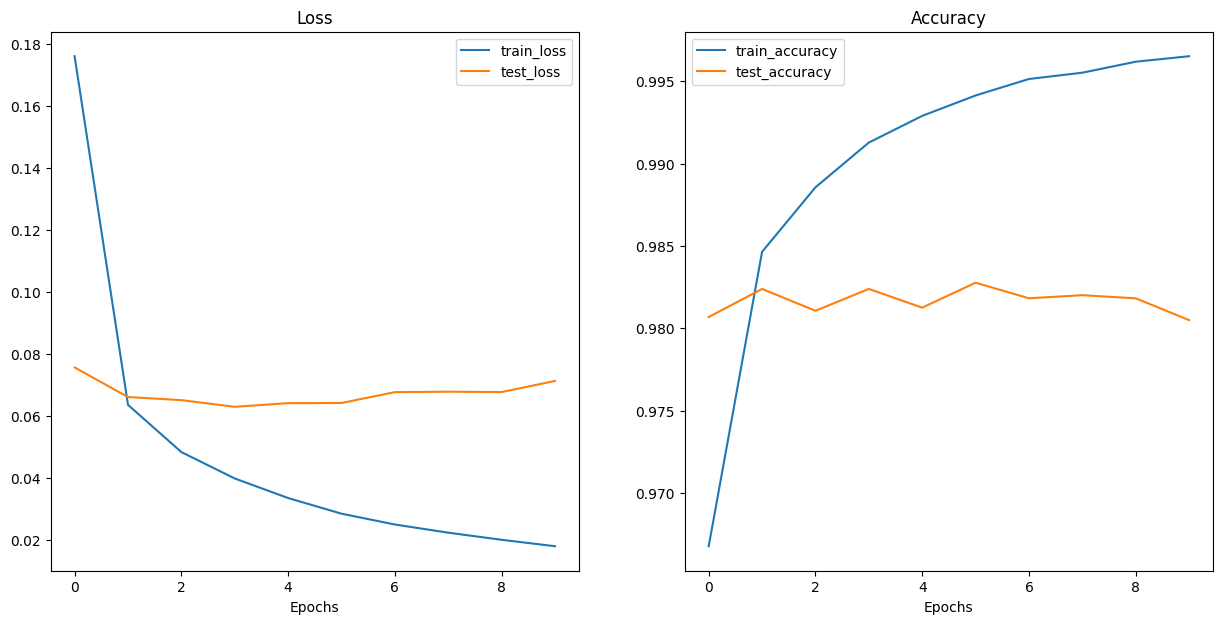

In [64]:
plot_loss_curves(pretrained_vit_results)